In this notebook, I test my MCMC fitting. 

Text(0.5,1,'ABC123 vs $\\mathrm{ABC123}^{123}$')

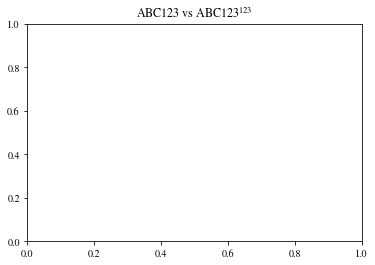

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import corner
sys.path.append(os.path.abspath('../src/'))
import global_signal_black_holes_mcmc as GSBH_MCMC
import global_signal_black_holes as GSBH
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

In [14]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml')

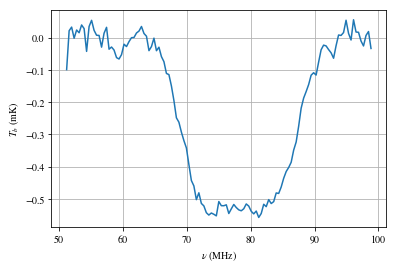

In [5]:
plt.plot(sampler.freqs,sampler.tb_meas)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.grid()

Here is the filtered variance. 

Text(0,0.5,'Var($T_b$) (mK)')

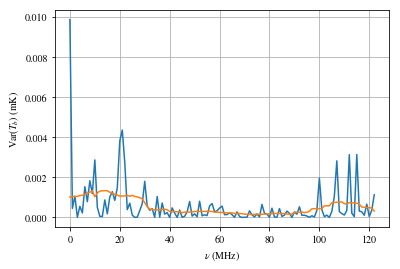

In [6]:
plt.plot(np.abs(sampler.dtb)**2.)
plt.plot(sampler.var_tb)
plt.grid()
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('Var($T_b$) (mK)')

Run the sampler. 

In [7]:
sampler.sample()

In [8]:
samples=sampler.sampler.chain[:, 10000:, :].reshape((-1, len(sampler.params_all.keys())))
ml_params=np.median(samples,axis=0)
ml_dict={'NU0':ml_params[0],'TAU':ml_params[1],'A':ml_params[2],'W':ml_params[3]}

Lets take a look at the chains (after reomoving 10,0000 burn points). 

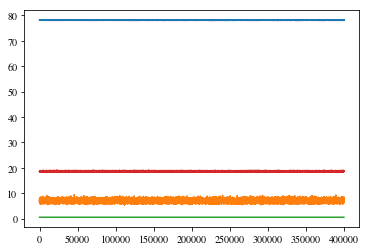

In [9]:
plt.plot(samples[:,0])
plt.plot(samples[:,1])
plt.plot(samples[:,2])
plt.plot(samples[:,3])

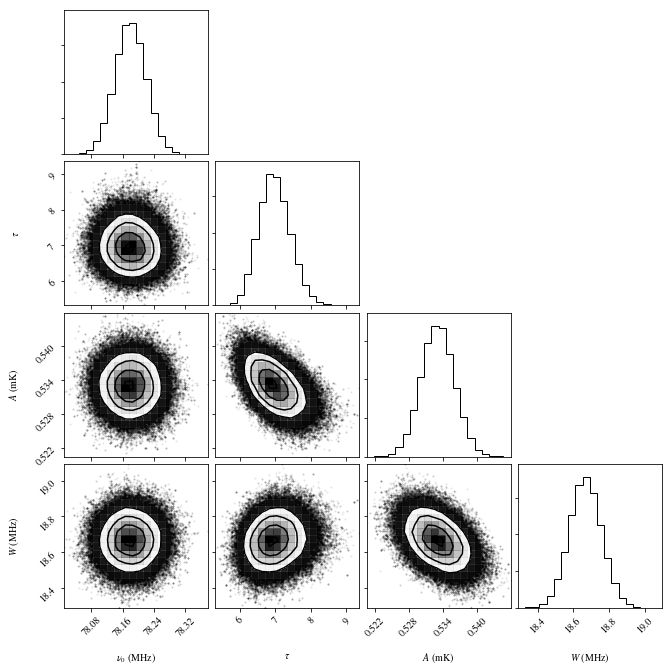

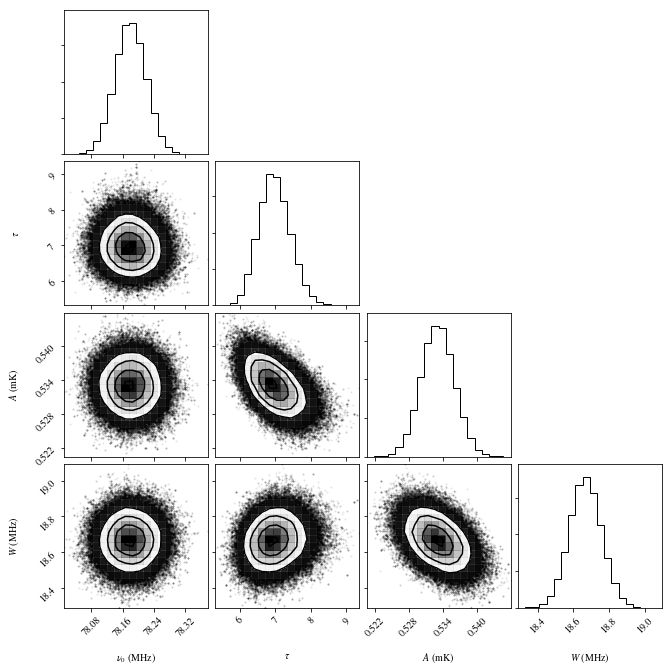

In [10]:
corner.corner(samples,labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)'))

Plot the maximum likelihood model, some draws, and the model

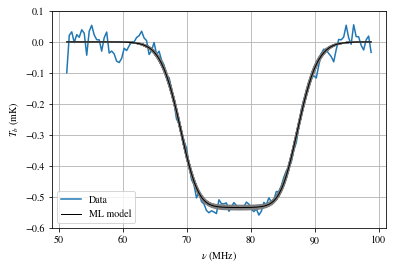

In [11]:
l1=plt.plot(sampler.freqs,sampler.tb_meas)[0]
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,39999)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
l2=plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**ml_dict),color='k',lw=1)[0]
plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2),('Data','ML model'))
plt.grid()

Load up output and make the same plot. 

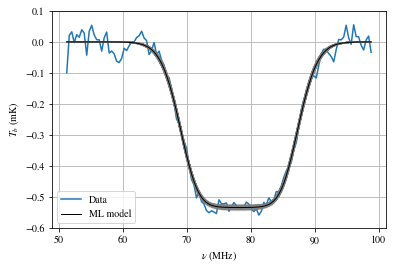

In [12]:
samples=np.load('test_analytic.npz')['chain'][:, 10000:, :].reshape((-1, len(sampler.params_all.keys())))
l1=plt.plot(sampler.freqs,sampler.tb_meas)[0]
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,39999)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
l2=plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**ml_dict),color='k',lw=1)[0]
plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2),('Data','ML model'))
plt.grid()

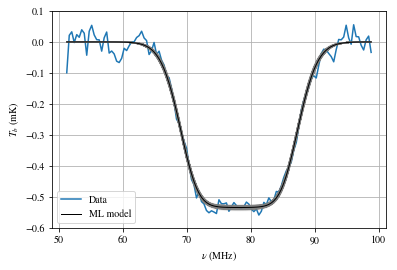

In [13]:
samples=np.load('test_analytic_mpi.npz')['chain'][:, 10000:, :].reshape((-1, len(sampler.params_all.keys())))
l1=plt.plot(sampler.freqs,sampler.tb_meas)[0]
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,39999)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
l2=plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**ml_dict),color='k',lw=1)[0]
plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2),('Data','ML model'))
plt.grid()

Next I will look into getting this running on Aurora. 